# <b><span style='color:#F1A424'>AutoChurn - Binary Classification - Bank Churn Prediction</span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Bank Churn Dataset**

**Features**:

- `customer_id`: customer_id .
- `credit_score`: credit score of customer.
- `country`: country of customer.
- `gender`: Gender of customer.
- `age`: Age of customer.
- `tenure`: tenure.
- `balance`: bank balance.
- `products_number`: products number.
- `credit_card`: having credit card or not.
- `active_member`: active member or not.
- `estimated_salary`: Estimated salary of customer..

**Target Variable**:

- `churn`: 1 if the client has left the bank during some period or 0 if he/she has not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the Customer Churn for ABC Bank.

**Usecase**:

Here, we will use AutoChurn(Automated Machine Learning for Churn prediction) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoChurn

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [6]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_churn')

In [7]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_churn")

In [8]:
# first 5 rows
bank_df.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [9]:
# bank_df dataset
bank_df.shape

(10000, 12)

In [10]:
# Performing sampling to get 80% for training and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [11]:
bank_df_sample.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,sampleid
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0,1
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0,1
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0,1
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0,1
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0,1
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0,1
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0,1
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0,2
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0,1


In [12]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [13]:
# train data shape
bank_df_train.shape

(8000, 12)

In [14]:
# test data shape
bank_df_test.shape

(2000, 12)

In [15]:
#train dataset
bank_df_train.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15566030,497,Germany,Male,41,5,80542.81,1,0,0,88729.22,1
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [16]:
# test dataset
bank_df_test.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15566253,580,Germany,Male,44,9,143391.07,1,0,0,146891.07,1
15566531,724,Germany,Male,33,4,88046.88,1,0,1,186942.49,1
15566594,709,Spain,Male,23,10,0.0,2,0,0,129590.18,0
15566633,698,Germany,Male,55,8,155059.1,2,1,1,144584.29,0
15566843,535,Germany,Male,20,9,134874.4,1,1,1,118825.56,0
15567013,779,Spain,Male,33,3,0.0,2,1,0,30804.68,0
15566708,444,France,Female,45,4,0.0,2,1,0,161653.5,1
15566292,574,Spain,Male,36,1,0.0,2,0,1,71709.12,0
15566211,616,Germany,Female,41,1,103560.57,1,1,0,236.45,1
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoChurn </b>

In [17]:
help(AutoChurn)

Help on class AutoChurn in module teradataml.automl:

class AutoChurn(AutoML)
 |  AutoChurn(include=None, exclude=None, verbose=0, max_runtime_secs=None, stopping_metric=None, stopping_tolerance=None, max_models=None, custom_config_file=None, **kwargs)
 |
 |  Method resolution order:
 |      AutoChurn
 |      AutoML
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, include=None, exclude=None, verbose=0, max_runtime_secs=None, stopping_metric=None, stopping_tolerance=None, max_models=None, custom_config_file=None, **kwargs)
 |      DESCRIPTION:
 |          AutoChurn is a dedicated AutoML pipeline designed specifically for churn prediction
 |          tasks. It automates the process of building, training, and evaluating models
 |          tailored to identify customer churn, streamlining the workflow for churn prediction
 |          use cases.
 |
 |      PARAMETERS:
 |          include:
 |              Optional Argument.
 |              Specifies the model algori

In [16]:
help(AutoML)

Help on class AutoML in module teradataml.automl:

class AutoML(builtins.object)
 |  AutoML(task_type='Default', include=None, exclude=None, verbose=0, max_runtime_secs=None, stopping_metric=None, stopping_tolerance=None, max_models=None, custom_config_file=None, is_fraud=False, is_churn=False, **kwargs)
 |
 |  Methods defined here:
 |
 |  __init__(self, task_type='Default', include=None, exclude=None, verbose=0, max_runtime_secs=None, stopping_metric=None, stopping_tolerance=None, max_models=None, custom_config_file=None, is_fraud=False, is_churn=False, **kwargs)
 |      DESCRIPTION:
 |          AutoML (Automated Machine Learning) is an approach that automates the process
 |          of building, training, and validating machine learning models. It involves
 |          various algorithms to automate various aspects of the machine learning workflow,
 |          such as data preparation, feature engineering, model selection, hyperparameter
 |          tuning, and model deployment. It ai

OR

In [17]:
# Creating AutoChurn instance
# Keeping early stopping metrics threshold to 0.5 for 'MICRO-RECALL', early stopping timer threshold to 100 sec
# and verbose level 2 for detailed loggging

aml = AutoChurn(stopping_metric='MACRO-F1', 
                stopping_tolerance=0.70,
                max_runtime_secs=100,
                verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 8000
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
credit_score,BIGINT,8000,0,None,0,8000,0,0.0,100.0
gender,VARCHAR(20) CHARACTER SET LATIN,8000,0,0,None,None,None,0.0,100.0
tenure,BIGINT,8000,0,None,324,7676,0,0.0,100.0
credit_card,BIGINT,8000,0,None,2353,5647,0,0.0,100.0
balance,FLOAT,8000,0,None,2872,5128,0,0.0,100.0
active_member,BIGINT,8000,0,None,3915,4085,0,0.0,100.0
estimated_salary,FLOAT,8000,0,None,0,8000,0,0.0,100.0
churn,BIGINT,8000,0,None,6349,1651,0,0.0,100.0
customer_id,BIGINT,8000,0,None,0,8000,0,0.0,100.0
country,VARCHAR(256) CHARACTER SET LATIN,8000,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
min,15565701,350,18,0,0,1,0,0,11.58,0
std,71929.92,97.306,10.504,2.895,62197.781,0.581,0.456,0.5,57371.372,0.405
25%,15628880.25,583,32,3,0,1,0,0,52331.53,0
50%,15691160,651,37,5,97535.745,1,1,1,100800.675,0
75%,15753554,717,44,8,127506.175,2,1,1,149669.933,0
max,15815690,850,92,10,250898.09,4,1,1,199992.48,1
mean,15690952.459,649.982,38.951,5.028,76661.544,1.526,0.706,0.511,100612.744,0.206
count,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
country                   3         
gender                    2         

No Futile columns found.

Target Column Distribution:


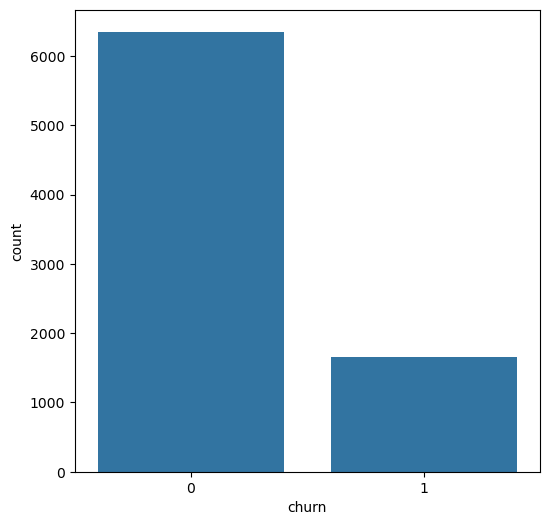

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
         ColumnName  OutlierPercentage
0               age             1.7750
1  estimated_salary             1.9875
2           balance             1.0000
3   products_number             0.5875
4      credit_score             0.9625
5       customer_id             1.9875


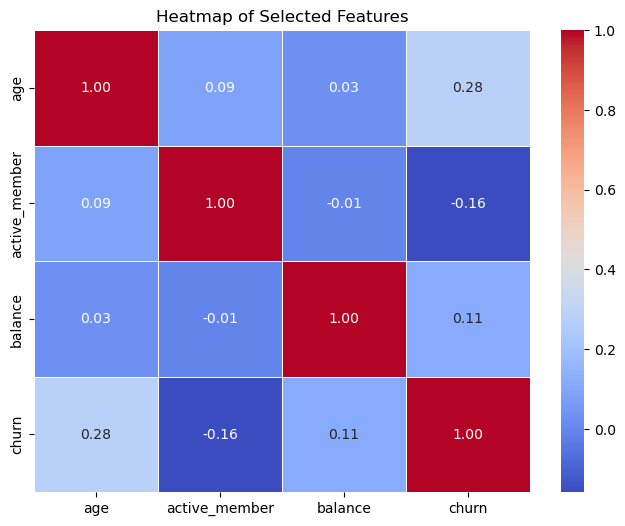


Number of features selected for Boxplots: 3

Selection Criteria: Features above threshold correlation

Selected Features: age, active_member, balance

Feature Distributions by Target Column (Boxplots):


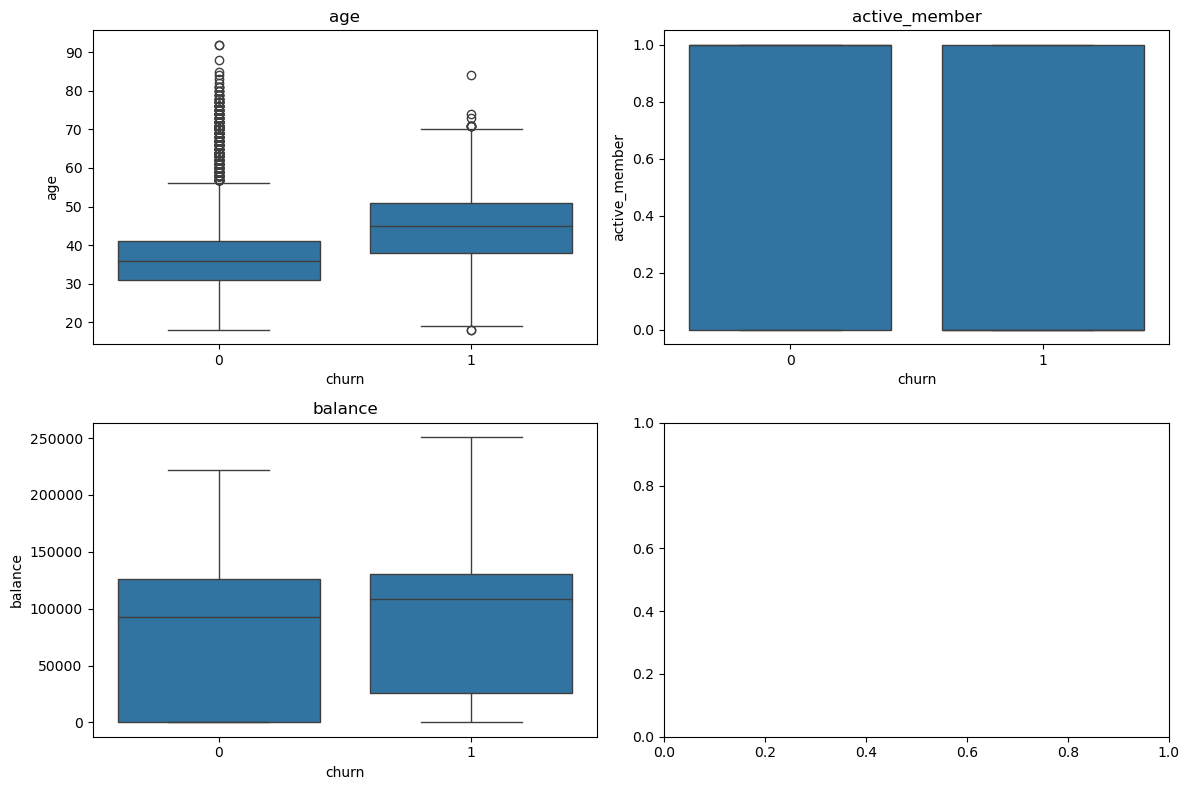


Categorical Feature Distributions by Target Column (Count Plots):


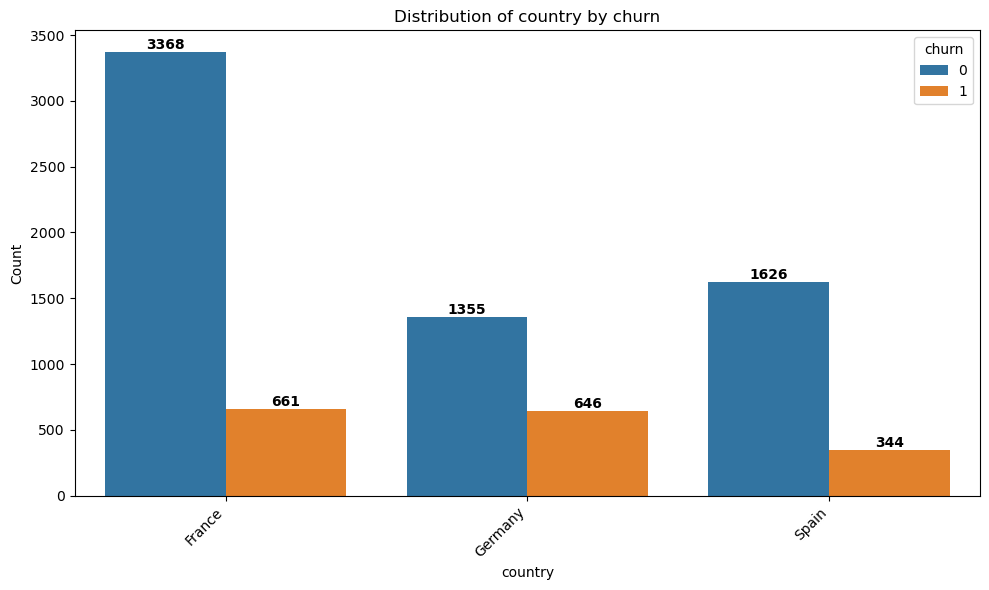

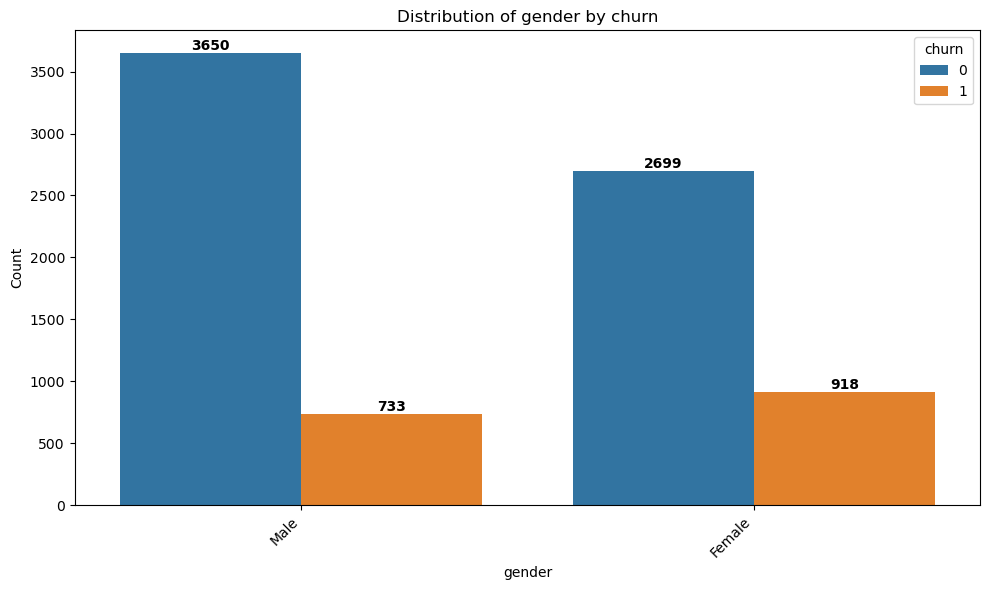

Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


['country', 'gender']


country,gender,age,estimated_salary,active_member,balance,tenure,id,credit_score,products_number,customer_id,churn,credit_card
0.17463540081177067,0.2537883844665561,65,181490.42,0,102541.1,9,95,516,1,15673995,0,1
0.17463540081177067,0.2537883844665561,56,186476.91,0,128472.8,1,119,585,1,15702095,1,1
0.17463540081177067,0.2537883844665561,29,190200.53,1,129938.07,4,127,826,1,15752463,0,0
0.17463540081177067,0.2537883844665561,35,116581.1,1,0.0,8,163,745,2,15747222,0,1
0.17463540081177067,0.16724597969890512,42,7680.23,0,0.0,7,187,553,2,15811742,0,1
0.17463540081177067,0.2537883844665561,27,82938.99,1,0.0,2,195,639,1,15643794,0,1
0.17463540081177067,0.2537883844665561,43,193650.16,1,103960.38,1,167,730,1,15618243,0,1
0.17463540081177067,0.16724597969890512,27,109296.18,0,90721.52,8,99,598,2,15778157,0,1
0.17463540081177067,0.2537883844665561,25,106920.57,0,108738.71,3,83,509,2,15670039,0,1
0.17463540081177067,0.16724597969890512,43,122937.57,0,184926.61,3,67,628,1,15679297,0,1


     active_member  tenure    id  credit_score  products_number  customer_id  churn  credit_card  country  gender  estimated_salary    balance
age                                                                                                                                           
40               0       8  1472           512                2     15733491      0            0   0.3228  0.2538          23101.13  153537.57
40               0       9  7607           644                4     15724161      1            1   0.1641  0.2538          77063.63  137285.26
40               0       2  2270           666                2     15662626      0            0   0.1641  0.2538          36371.27       0.00
40               0       3  3069           507                1     15619514      1            1   0.3228  0.1672          92075.01  120105.43
40               1       7  7601           621                2     15584090      1            0   0.1746  0.2538         131283.60       0.00

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
         ColumnName  OutlierPercentage
0               age             1.7750
1           balance             1.0000
2      credit_score             0.9625
3                id             1.9875
4  estimated_salary             1.9875
5       customer_id             1.9875
6   products_number             0.5875


['products_number', 'age', 'id', 'customer_id', 'estimated_salary', 'balance', 'credit_score']


country,gender,age,estimated_salary,active_member,balance,tenure,id,credit_score,products_number,customer_id,churn,credit_card
0.17463540081177067,0.2537883844665561,29,190200.53,1,129938.07,4,4003,651,1,15752463,0,0
0.17463540081177067,0.16724597969890512,42,100800.675,0,0.0,7,4003,553,2,15691160,0,1
0.17463540081177067,0.2537883844665561,27,82938.99,1,0.0,2,4003,639,1,15643794,0,1
0.17463540081177067,0.2537883844665561,44,100800.675,0,0.0,5,4003,547,1,15691817,1,0
0.17463540081177067,0.16724597969890512,36,120138.27,1,94153.56,0,4003,606,1,15795571,0,0
0.17463540081177067,0.2537883844665561,55,17095.49,1,133676.65,1,4003,645,1,15686780,0,0
0.16407106079404465,0.2537883844665561,31,100800.675,0,0.0,8,637,696,2,15676521,0,0
0.16407106079404465,0.16724597969890512,35,28707.69,0,127120.07,6,2478,651,1,15766746,0,1
0.16407106079404465,0.2537883844665561,46,20276.87,0,109705.52,2,4003,728,1,15691160,1,1
0.16407106079404465,0.16724597969890512,45,124607.7,0,137555.44,7,4003,625,1,15723894,0,0


['age', 'estimated_salary', 'active_member', 'gender', 'balance', 'tenure', 'credit_score', 'products_number', 'customer_id', 'country', 'credit_card']


['age', 'estimated_salary', 'active_member', 'gender', 'balance', 'tenure', 'credit_score', 'products_number', 'customer_id', 'country', 'credit_card']


churn,id,age,estimated_salary,active_member,gender,balance,tenure,credit_score,products_number,customer_id,country,credit_card
0,2,0.2972972972972973,0.7757924381778459,0.0,1.0,0.0,0.6,0.542,0.0,0.8667941389421134,0.0,1.0
0,4,0.581081081081081,0.22603388623613552,1.0,1.0,0.5663867349488392,0.6,0.44,0.0,0.334866734136302,0.0,1.0
0,5,0.21621621621621623,0.04833171567884732,0.0,0.0,0.5475932877767223,0.2,0.418,0.3333333333333333,0.040729792110852876,0.0,1.0
0,6,0.2972972972972973,0.5704652294294104,0.0,1.0,0.0,0.4,0.466,0.3333333333333333,0.8603498553936373,0.06616257088846887,1.0
1,8,0.581081081081081,0.751153085119629,0.0,0.0,0.0,0.9,0.53,0.3333333333333333,0.4432915048262124,0.06616257088846887,1.0
0,9,0.21621621621621623,0.12376071914867867,0.0,0.0,0.5481230247707346,0.1,0.58,0.0,0.622435387157035,0.06616257088846887,0.0
0,7,0.013513513513513514,0.22803262711588954,0.0,0.0,0.3024662324053563,0.0,0.75,0.0,0.3255743252703119,1.0,0.0
0,3,0.013513513513513514,0.1663721885440059,0.0,0.0,0.5715089740220821,0.7,0.884,0.0,0.4581881602790523,0.0,1.0
0,1,0.21621621621621623,0.21621109815987422,1.0,0.0,0.416456617904106,0.0,0.496,0.0,0.7306361479905116,0.06616257088846887,0.0
0,0,0.581081081081081,0.5091895776046612,1.0,0.0,0.36297777316678653,0.7,0.534,0.0,0.7747540891799239,0.06616257088846887,1.0


['age', 'active_member', 'tenure', 'credit_score', 'products_number', 'customer_id', 'credit_card', 'country', 'gender', 'estimated_salary', 'balance']


['r_age', 'r_active_member', 'r_tenure', 'r_credit_score', 'r_products_number', 'r_customer_id', 'r_credit_card', 'r_country', 'r_gender', 'r_estimated_salary', 'r_balance']


churn,id,r_age,r_active_member,r_tenure,r_credit_score,r_products_number,r_customer_id,r_credit_card,r_country,r_gender,r_estimated_salary,r_balance
0,2,0.2972972972972973,0.0,0.6,0.542,0.0,0.8667941389421134,1.0,0.0,1.0,0.7757924381778459,0.0
0,4,0.581081081081081,1.0,0.6,0.44,0.0,0.334866734136302,1.0,0.0,1.0,0.22603388623613552,0.5663867349488392
0,5,0.21621621621621623,0.0,0.2,0.418,0.3333333333333333,0.040729792110852876,1.0,0.0,0.0,0.04833171567884732,0.5475932877767223
0,6,0.2972972972972973,0.0,0.4,0.466,0.3333333333333333,0.8603498553936373,1.0,0.06616257088846887,1.0,0.5704652294294104,0.0
1,8,0.581081081081081,0.0,0.9,0.53,0.3333333333333333,0.4432915048262124,1.0,0.06616257088846887,0.0,0.751153085119629,0.0
0,9,0.21621621621621623,0.0,0.1,0.58,0.0,0.622435387157035,0.0,0.06616257088846887,0.0,0.12376071914867867,0.5481230247707346
0,7,0.013513513513513514,0.0,0.0,0.75,0.0,0.3255743252703119,0.0,1.0,0.0,0.22803262711588954,0.3024662324053563
0,3,0.013513513513513514,0.0,0.7,0.884,0.0,0.4581881602790523,1.0,0.0,0.0,0.1663721885440059,0.5715089740220821
0,1,0.21621621621621623,1.0,0.0,0.496,0.0,0.7306361479905116,0.0,0.06616257088846887,0.0,0.21621109815987422,0.416456617904106
0,0,0.581081081081081,1.0,0.7,0.534,0.0,0.7747540891799239,1.0,0.06616257088846887,0.0,0.5091895776046612,0.36297777316678653


['country', 'gender', 'age', 'estimated_salary', 'active_member', 'balance', 'tenure', 'credit_score', 'products_number', 'customer_id', 'credit_card']


churn,id,country,gender,age,estimated_salary,active_member,balance,tenure,credit_score,products_number,customer_id,credit_card
0,4003,0.06656406988050044,1.0,0.11428571428571428,0.9985733439738419,1.0,0.7994607712665323,0.4,0.5015290519877675,0.0,0.7729291850269284,0.0
0,4003,0.06656406988050044,0.0,0.4857142857142857,0.5029533786617518,0.0,0.0,0.7,0.2018348623853211,1.0,0.5000712155606,1.0
0,4003,0.06656406988050044,1.0,0.05714285714285714,0.4039307605588983,1.0,0.0,0.2,0.4648318042813456,0.0,0.28924645034940133,1.0
1,4003,0.06656406988050044,1.0,0.5428571428571428,0.5029533786617518,0.0,0.0,0.5,0.1834862385321101,0.0,0.5029955045177371,0.0
0,4003,0.06656406988050044,0.0,0.3142857142857143,0.610158229979679,1.0,0.5792919480417842,0.0,0.363914373088685,0.0,0.9648017091734544,0.0
0,4003,0.06656406988050044,1.0,0.8571428571428571,0.038903846521659714,1.0,0.8224628679595308,0.1,0.4831804281345566,0.0,0.48057595584635243,0.0
0,637,0.0,1.0,0.17142857142857143,0.5029533786617518,0.0,0.0,0.8,0.6391437308868502,1.0,0.4349134285841456,0.0
0,2478,0.0,0.0,0.2857142857142857,0.10328021672043744,0.0,0.7821226620162633,0.6,0.5015290519877675,0.0,0.836502425780033,1.0
1,4003,0.0,1.0,0.6,0.05654096064499443,0.0,0.6749773921637898,0.2,0.7370030581039755,0.0,0.5000712155606,1.0
0,4003,0.0,0.0,0.5714285714285714,0.6349361084400502,0.0,0.8463276248008547,0.7,0.42201834862385323,0.0,0.6457693506031068,0.0


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


response_column : churn                                                                                                                               
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1,)
seed : 42
Total number of models for decision_forest : 36
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : churn
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 2592
-------------------------------------------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_4,rfe,0.845669,0.845669,0.845669,0.845669,0.846295,0.845669,0.845600,0.846295,0.845669,0.845600
1,2,KNN_0,lasso,0.845669,0.845669,0.845669,0.845669,0.846295,0.845669,0.845600,0.846295,0.845669,0.845600
2,3,KNN_9,lasso,0.839764,0.839764,0.839764,0.839764,0.840270,0.839764,0.839704,0.840270,0.839764,0.839704
3,4,KNN_13,rfe,0.839764,0.839764,0.839764,0.839764,0.840270,0.839764,0.839704,0.840270,0.839764,0.839704
4,5,XGBOOST_2,pca,0.805000,0.805000,0.805000,0.805000,0.694758,0.635891,0.653486,0.782540,0.805000,0.787815
5,6,DECISIONFOREST_2,pca,0.794375,0.794375,0.794375,0.794375,0.666889,0.594579,0.608156,0.761197,0.794375,0.766518
6,7,DECISIONFOREST_1,rfe,0.793307,0.793307,0.793307,0.793307,0.805629,0.793307,0.791203,0.805629,0.793307,0.791203
7,8,DECISIONFOREST_0,lasso,0.792913,0.792913,0.792913,0.792913,0.805118,0.792913,0.790822,0.805118,0.792913,0.790822
8,9,DECISIONFOREST_3,lasso,0.792913,0.792913,0.792913,0.792913,0.805118,0.792913,0.790822,0.805118,0.792913,0.790822
9,10,XGBOOST_1,rfe,0.759449,0.759449,0.759449,0.759449,0.793933,0.759449,0.752180,0.793933,0.759449,0.752180


In [18]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.churn)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [19]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_4,rfe,0.845669,0.845669,0.845669,0.845669,0.846295,0.845669,0.845600,0.846295,0.845669,0.845600
1,2,KNN_0,lasso,0.845669,0.845669,0.845669,0.845669,0.846295,0.845669,0.845600,0.846295,0.845669,0.845600
2,3,KNN_9,lasso,0.839764,0.839764,0.839764,0.839764,0.840270,0.839764,0.839704,0.840270,0.839764,0.839704
3,4,KNN_13,rfe,0.839764,0.839764,0.839764,0.839764,0.840270,0.839764,0.839704,0.840270,0.839764,0.839704
4,5,XGBOOST_2,pca,0.805000,0.805000,0.805000,0.805000,0.694758,0.635891,0.653486,0.782540,0.805000,0.787815
5,6,DECISIONFOREST_2,pca,0.794375,0.794375,0.794375,0.794375,0.666889,0.594579,0.608156,0.761197,0.794375,0.766518
6,7,DECISIONFOREST_1,rfe,0.793307,0.793307,0.793307,0.793307,0.805629,0.793307,0.791203,0.805629,0.793307,0.791203
7,8,DECISIONFOREST_0,lasso,0.792913,0.792913,0.792913,0.792913,0.805118,0.792913,0.790822,0.805118,0.792913,0.790822
8,9,DECISIONFOREST_3,lasso,0.792913,0.792913,0.792913,0.792913,0.805118,0.792913,0.790822,0.805118,0.792913,0.790822
9,10,XGBOOST_1,rfe,0.759449,0.759449,0.759449,0.759449,0.793933,0.759449,0.752180,0.793933,0.759449,0.752180


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [20]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_4,rfe,0.845669,0.845669,0.845669,0.845669,0.846295,0.845669,0.8456,0.846295,0.845669,0.8456


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [21]:
aml.model_hyperparameters(rank=1)

{'response_column': 'churn',
 'name': 'knn',
 'model_type': 'Classification',
 'k': 3,
 'id_column': 'id',
 'voting_weight': 1.0,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

In [22]:
aml.model_hyperparameters(rank=5)

{'response_column': 'churn',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

Data Transformation started ...


customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,id
15569976,754,Germany,Male,65,1,136186.44,1,1,1,121529.59,1,14
15803790,638,Germany,Male,37,2,89728.86,2,1,1,37294.88,0,8
15702442,586,Germany,Female,56,9,100781.75,2,1,1,54448.41,0,12
15688963,731,France,Female,52,10,0.0,1,1,1,24998.75,1,5
15769246,813,Germany,Male,59,2,135078.41,1,1,0,187636.06,1,13
15629133,579,France,Female,27,9,0.0,2,1,0,126838.7,0,7
15585066,660,France,Female,43,1,0.0,1,0,1,112026.1,1,11
15768104,788,Spain,Male,37,8,141541.25,1,0,0,66013.27,0,15
15675749,695,France,Female,23,1,0.0,2,1,1,141756.32,0,9
15614716,515,France,Female,37,0,196853.62,1,1,1,132770.11,0,4


country,gender,age,estimated_salary,active_member,balance,tenure,id,credit_score,products_number,customer_id,churn,credit_card
0.16407106079404465,0.2537883844665561,43,16301.91,1,0.0,6,84,650,2,15649136,0,1
0.16407106079404465,0.16724597969890512,31,93713.13,0,0.0,5,51,496,2,15717307,0,1
0.16407106079404465,0.16724597969890512,40,129975.34,1,0.0,1,1184,455,3,15812534,0,0
0.16407106079404465,0.16724597969890512,30,18471.86,1,0.0,6,68,547,2,15745794,0,1
0.16407106079404465,0.16724597969890512,33,66979.06,0,88294.6,6,108,670,1,15773934,0,1
0.16407106079404465,0.16724597969890512,37,74320.75,1,0.0,7,132,581,2,15702337,0,1
0.16407106079404465,0.2537883844665561,40,183044.86,1,101891.1,2,521,795,1,15589420,0,1
0.16407106079404465,0.16724597969890512,37,67840.81,1,0.0,2,79,656,2,15662901,0,0
0.16407106079404465,0.16724597969890512,46,170676.67,0,0.0,9,35,589,2,15719265,0,1
0.16407106079404465,0.16724597969890512,30,181300.32,1,0.0,1,19,705,1,15677217,0,1


id,age,estimated_salary,active_member,gender,balance,tenure,credit_score,products_number,customer_id,country,credit_card,churn
891,34,168822.01,1,0.2538,88772.87,4,608,1,15676526,0.1641,1,0
1742,34,196555.32,0,0.2538,144855.34,6,569,1,15744843,0.1746,0,0
2022,34,86330.32,1,0.1672,0.0,1,792,1,15623730,0.1641,0,0
1024,34,54726.43,0,0.2538,0.0,3,648,1,15768124,0.1641,1,0
607,34,65219.85,1,0.1672,0.0,7,754,2,15653448,0.1641,1,0
355,34,53512.16,1,0.1672,40105.51,2,636,2,15684042,0.3228,0,0
73,34,114006.35,1,0.1672,0.0,9,630,2,15780256,0.1641,1,0
1985,34,167035.07,0,0.2538,0.0,1,680,2,15772632,0.1641,1,0
1822,34,25339.29,1,0.1672,114609.55,9,683,2,15717700,0.1746,0,0
1191,34,38315.04,1,0.2538,123034.43,3,633,2,15736371,0.1641,1,0


churn,id,age,estimated_salary,active_member,gender,balance,tenure,credit_score,products_number,customer_id,country,credit_card
0,1752,0.2972972972972973,0.5271600937889568,1.0,1.0,0.0,0.4,0.414,0.3333333333333333,0.9414854253587158,0.06616257088846887,0.0
0,1061,0.581081081081081,0.7917096582723651,1.0,1.0,0.6214918176539327,0.5,0.62,0.0,0.47390085163747203,0.06616257088846887,1.0
0,1284,0.581081081081081,0.2258676703625196,1.0,0.0,0.5334647226688732,0.6,0.352,0.3333333333333333,0.1843801127249599,1.0,1.0
0,633,0.013513513513513514,0.8845433238874313,1.0,0.0,0.0,0.5,0.526,0.0,0.7020068883030853,0.06616257088846887,1.0
0,1047,0.013513513513513514,0.2018046223414336,1.0,0.0,0.5087708718707264,0.5,0.62,0.0,0.19818472012768562,0.0,1.0
0,1191,0.21621621621621623,0.19153559164900244,1.0,1.0,0.49037611246861224,0.3,0.566,0.3333333333333333,0.6827100392417267,0.0,1.0
0,1822,0.21621621621621623,0.12665064513661053,1.0,0.0,0.45679721993898004,0.9,0.666,0.3333333333333333,0.6080227530011321,0.06616257088846887,0.0
0,891,0.21621621621621623,0.8441327646790269,1.0,1.0,0.3538204296413735,0.4,0.516,0.0,0.4433195060582666,0.0,1.0
0,450,0.013513513513513514,0.8807122080158656,1.0,1.0,0.45399102081645976,0.3,0.584,0.0,0.8105916660333055,1.0,1.0
0,127,0.581081081081081,0.6183192994931015,0.0,1.0,0.5959604554980868,0.4,0.726,0.3333333333333333,0.06587089831952606,1.0,1.0


id,age,active_member,tenure,credit_score,products_number,customer_id,credit_card,country,gender,estimated_salary,balance,churn
1047,19,1,5,660,1,15615245,1,0.1641,0.1672,40368.65,127649.64,0
161,59,1,5,616,1,15675501,1,0.1641,0.1672,17699.48,153861.1,0
405,59,0,7,655,1,15606613,1,0.1641,0.2538,88958.49,0.0,1
288,59,1,5,518,1,15615219,0,0.1641,0.1672,123872.0,138772.15,0
2042,59,1,5,633,1,15584271,1,0.1641,0.1672,137273.97,0.0,0
533,59,1,6,720,2,15650575,1,0.1746,0.2538,160849.43,0.0,1
125,59,1,1,817,1,15778481,1,0.1641,0.1672,120819.58,118962.58,0
1153,19,1,1,696,1,15665062,1,0.1641,0.1672,2766.63,110928.51,0
450,19,1,3,642,1,15768340,1,0.3228,0.2538,176137.2,113905.48,0
633,19,1,5,613,1,15741195,1,0.1746,0.1672,176903.35,0.0,0


churn,id,r_age,r_active_member,r_tenure,r_credit_score,r_products_number,r_customer_id,r_credit_card,r_country,r_gender,r_estimated_salary,r_balance
0,891,0.21621621621621623,1.0,0.4,0.516,0.0,0.4433195060582666,1.0,0.0,1.0,0.8441327646790269,0.3538204296413735
0,1061,0.581081081081081,1.0,0.5,0.62,0.0,0.47390085163747203,1.0,0.06616257088846887,1.0,0.7917096582723651,0.6214918176539327
0,1284,0.581081081081081,1.0,0.6,0.352,0.3333333333333333,0.1843801127249599,1.0,1.0,0.0,0.2258676703625196,0.5334647226688732
0,991,0.2972972972972973,1.0,0.6,0.63,0.0,0.9715667489369533,1.0,0.0,1.0,0.8092595342855242,0.0
0,1752,0.2972972972972973,1.0,0.4,0.414,0.3333333333333333,0.9414854253587158,0.0,0.06616257088846887,1.0,0.5271600937889568,0.0
0,633,0.013513513513513514,1.0,0.5,0.526,0.0,0.7020068883030853,1.0,0.06616257088846887,0.0,0.8845433238874313,0.0
0,450,0.013513513513513514,1.0,0.3,0.584,0.0,0.8105916660333055,1.0,1.0,1.0,0.8807122080158656,0.45399102081645976
0,1047,0.013513513513513514,1.0,0.5,0.62,0.0,0.19818472012768562,1.0,0.0,0.0,0.2018046223414336,0.5087708718707264
0,113,0.2972972972972973,1.0,0.1,0.778,0.0,0.6588129877714619,1.0,0.06616257088846887,0.0,0.9666409142073067,0.43715601820643596
0,127,0.581081081081081,0.0,0.4,0.726,0.3333333333333333,0.06587089831952606,1.0,1.0,1.0,0.6183192994931015,0.5959604554980868


churn,id,country,gender,age,estimated_salary,active_member,balance,tenure,credit_score,products_number,customer_id,credit_card
0,1284,1.0001234515014386,-0.0005312967559495954,1.0285714285714285,0.19460477431376064,1.0,0.8235003858313807,0.6,0.11926605504587157,1.0,0.14681532914941914,1.0
0,450,1.0001234515014386,1.0001342178262218,-0.17142857142857143,0.9206082608451001,1.0,0.7008181889440451,0.3,0.4740061162079511,0.0,0.843597276004807,1.0
0,1047,0.0001823409057513656,-0.0005312967559495954,-0.17142857142857143,0.16792690536110325,1.0,0.7853809098926525,0.5,0.5290519877675841,0.0,0.16217563537632973,1.0
0,991,0.0001823409057513656,1.0001342178262218,0.42857142857142855,0.8413911531692703,1.0,0.0,0.6,0.5443425076452599,0.0,1.0227133128588597,1.0
0,1752,0.0663410155198328,1.0001342178262218,0.42857142857142855,0.5286372618671098,1.0,0.0,0.4,0.21406727828746178,1.0,0.9892419993768639,0.0
0,1191,0.0001823409057513656,1.0001342178262218,0.2571428571428571,0.15654198625844296,1.0,0.7569852338128322,0.3,0.44648318042813456,1.0,0.7013041349534873,1.0
0,1822,0.0663410155198328,-0.0005312967559495954,0.2571428571428571,0.0846062905585075,1.0,0.7051500706260312,0.9,0.599388379204893,1.0,0.6182000267058352,0.0
0,891,0.0001823409057513656,1.0001342178262218,0.2571428571428571,0.8800538973726834,1.0,0.5461865573172173,0.4,0.37003058103975534,0.0,0.43493568344683314,1.0
0,113,0.0663410155198328,-0.0005312967559495954,0.42857142857142855,1.015874444956019,1.0,0.6748302827982207,0.1,0.7706422018348624,0.0,0.6747140250144656,1.0
0,633,0.0663410155198328,-0.0005312967559495954,-0.17142857142857143,0.924855686486046,1.0,0.0,0.5,0.3853211009174312,0.0,0.7227756264743846,1.0


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,churn
0,127,-0.218132,-0.741885,0.094154,0.421978,0.919466,-0.112036,-0.491158,0.173797,0.091535,0.190103,0
1,1191,0.444368,-0.102600,0.669959,0.366034,0.047409,-0.192467,0.151029,-0.243899,0.626099,-0.063673,0
2,991,-0.017878,-0.030549,0.675110,0.269788,-0.652481,0.067515,0.567939,0.216991,-0.420111,0.025307,0
3,633,0.087275,0.641760,-0.061689,0.237886,-0.544579,-0.038230,0.263710,0.323846,-0.424554,-0.122047,0
4,1061,-0.505804,0.095992,0.732944,0.318725,-0.346595,-0.030616,0.001920,0.390050,0.226935,0.014239,0
5,1822,0.533168,0.608769,0.034016,-0.633384,0.310279,0.425957,0.109154,-0.266175,0.538250,0.094876,0
6,113,-0.250374,0.730597,-0.007525,0.259083,-0.359597,-0.463484,0.207582,0.495134,0.006043,0.253962,0
7,450,-0.632578,0.102656,0.765680,0.463098,0.348271,-0.230481,0.361497,0.320768,-0.239986,-0.052738,0
8,1284,0.132764,0.626856,0.013373,0.482768,0.898613,0.133137,-0.395402,-0.257720,0.070159,-0.376626,0
9,891,-0.256883,0.038705,0.698861,0.290818,-0.507812,-0.121095,-0.037045,0.386762,0.017339,-0.136815,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_2 
Feature Selection Method : pca

Applying SHAP for Model Interpretation...

SHAP Analysis Completed. Feature Importance Available.


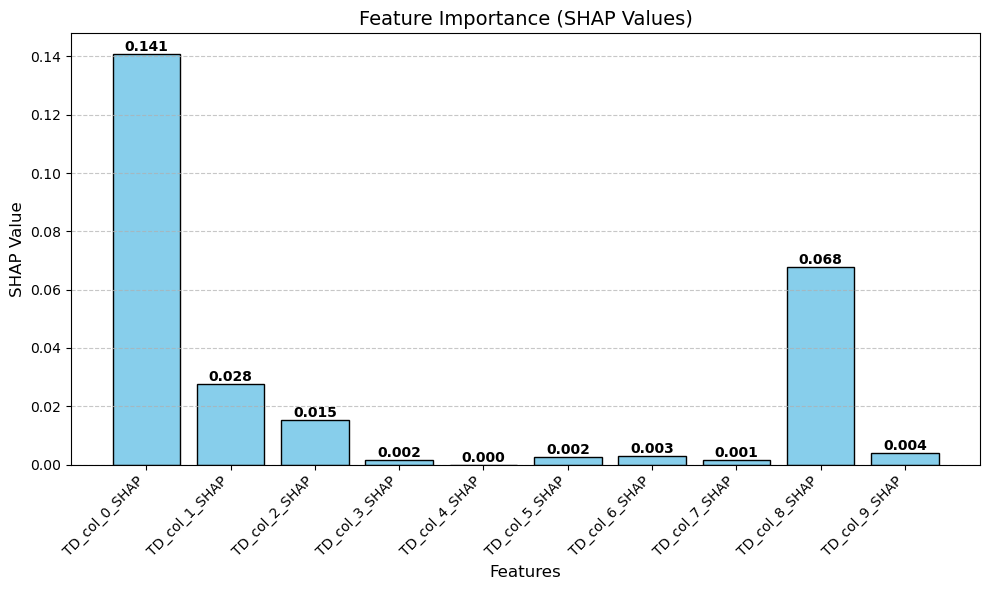


Prediction : 
     id  prediction  prob_1  prob_0  churn
0   991           0     0.0     1.0      0
1  1061           0     0.0     1.0      0
2  1822           0     0.0     1.0      0
3   113           0     0.0     1.0      0
4  1284           0     0.0     1.0      0
5   891           0     0.0     1.0      0
6   450           0     0.0     1.0      0
7   633           0     0.0     1.0      0
8  1191           0     0.0     1.0      0
9   127           1     1.0     0.0      0

ROC-AUC : 


AUC,GINI
0.56884546487663,0.13769092975326003


threshold_value,tpr,fpr
0.04081632653061224,0.20725388601036268,0.05762081784386617
0.08163265306122448,0.20725388601036268,0.05762081784386617
0.1020408163265306,0.20725388601036268,0.05762081784386617
0.12244897959183673,0.20725388601036268,0.05762081784386617
0.16326530612244897,0.20725388601036268,0.05762081784386617
0.18367346938775508,0.20725388601036268,0.05762081784386617
0.14285714285714285,0.20725388601036268,0.05762081784386617
0.061224489795918366,0.20725388601036268,0.05762081784386617
0.02040816326530612,0.20725388601036268,0.05762081784386617
0.0,1.0,1.0



Confusion Matrix : 


array([[1521,   93],
       [ 306,   80]], dtype=int64)

In [23]:
# Generating prediction on test data
prediction = aml.predict(bank_df_test, rank=6)

In [24]:
# Printing prediction
prediction.head()

id,prediction,prob_1,prob_0,churn
6,0,0.0,1.0,0
8,0,0.0,1.0,0
9,0,0.0,1.0,0
10,0,0.0,1.0,1
12,0,0.0,1.0,0
13,0,0.0,1.0,1
11,0,0.0,1.0,1
7,0,0.0,1.0,0
5,0,0.0,1.0,1
4,0,0.0,1.0,0


In [25]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(bank_df_test, rank=6)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_2 
Feature Selection Method : pca

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1     1521      306   0.832512  0.942379  0.884045     1614
1               1  CLASS_2       93       80   0.462428  0.207254  0.286225      386
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.800500
1       5     Macro-Precision     0.647470
2       6        Macro-Recall     0.574817
3       7            Macro-F1     0.585135
4       9     Weighted-Recall     0.800500
5      10         Weighted-F1     0.768666
6       8  Weighted-Precision     0.761086
7       4            Micro-F1     0.8005

In [26]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
0,0,CLASS_1,1521,306,0.8325123152709359,0.9423791821561338,0.8840453356582388,1614
1,1,CLASS_2,93,80,0.4624277456647399,0.20725388601036268,0.28622540250447226,386


In [27]:
aml.deploy(table_name='top_10_models', top_n=10)

Model Deployment Completed Successfully.


In [28]:
aml.deploy(table_name='mixed_models', ranks=[2,5,6,9])

Model Deployment Completed Successfully.


In [29]:
aml.deploy(table_name='range_models', ranks=range(8,11))

Model Deployment Completed Successfully.


In [30]:
remove_context()

True